## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [89]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [90]:
RegData=np.genfromtxt('RegData.csv',delimiter=',')

#### Explore your data

In [91]:
RegData

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [92]:
X=RegData[:,0]
y=RegData[:,1]

#### Explore your data

In [93]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [94]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

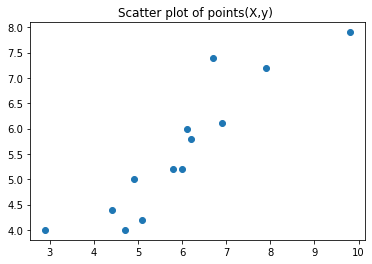

In [95]:
plt.gca().set_title("Scatter plot of points(X,y) ")
plt.scatter(X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

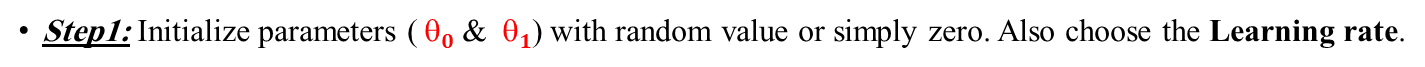

In [96]:
import random
theta0=random.randrange(0,5)
theta1=random.randrange(0,5)

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.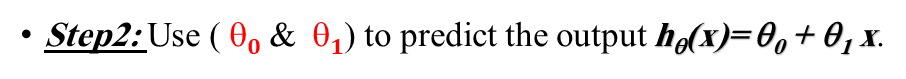
#### Note: you will need to iterate through all data points

In [97]:
h_thetaX=[]
for i in range(len(X)):
    HX=theta0+(theta1*X[i])
    h_thetaX.append(HX)


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).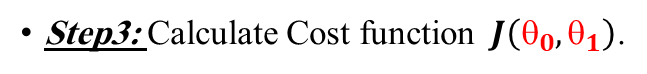
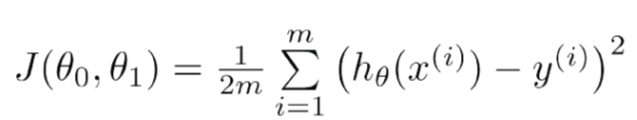

In [98]:
summition_cost=0
for i in range (len(y)):
    loss=(h_thetaX[i]-y[i])**2
    summition_cost=summition_cost+(loss/2*len(X))


### Step4: Calculate the gradient.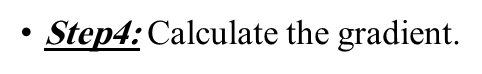
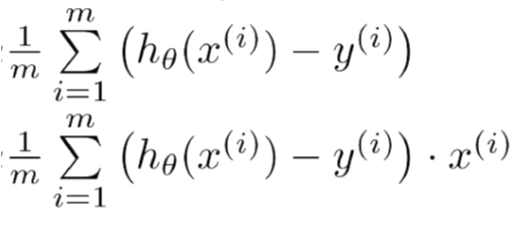

In [99]:
gradient_theta0=0
gradient_theta1=0
for i in range(len(y)):
    gradient_theta0+=(1/len(y))*(h_thetaX[i]-y[i])
    gradient_theta1+=(1/len(y))*((h_thetaX[i]-y[i])*X[i])


### Step5: Update the parameters (simultaneously).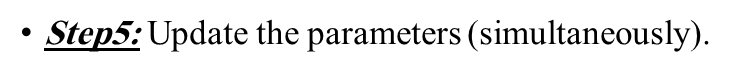
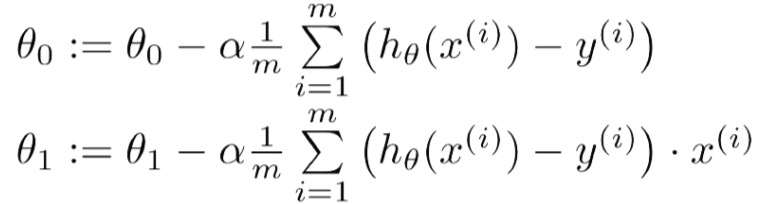

In [100]:
Alpha=0.01
itr=5000
theta0=[theta0]
theta1=[theta1]
for i in range(itr):
    theta0.append(theta0[i-1]-Alpha*gradient_theta0)
    theta1.append(theta1[i-1]-Alpha*gradient_theta1)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.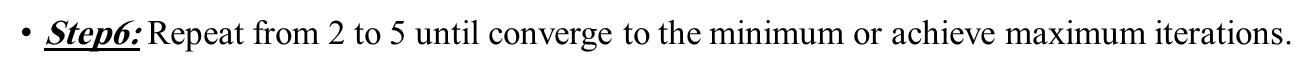

In [101]:
Alpha=0.001
itr=10000
theta0=random.randrange(0,5)
theta1=random.randrange(0,5)
loss_arr2=[]
for it in range(itr):
    
    #step2
    h_thetaX=[]
    for i in range(len(X)):
        HX=theta0+(theta1*X[i])
        h_thetaX.append(HX)
    #step3
    summition_cost=0
    for i in range (len(y)):
        loss=(h_thetaX[i]-y[i])**2
        summition_cost=summition_cost+(loss/2*len(X))
    loss_arr2.append(summition_cost)

    #Step4
    gradient_theta0=0
    gradient_theta1=0
    for i in range(len(y)):
        gradient_theta0+=(1/len(y))*(h_thetaX[i]-y[i])
        gradient_theta1+=(1/len(y))*((h_thetaX[i]-y[i])*X[i])

    #step5

    theta0=(theta0-Alpha*gradient_theta0)
    theta1=(theta1-Alpha*gradient_theta1)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [102]:
Hx=[]

for i in range(len(y)):
    Hx.append(theta0+(theta1*X[i]))

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0.5, 1.0, ' Linear regression line ')

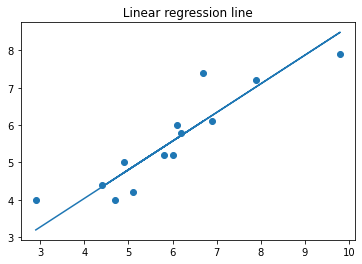

In [103]:
plt.plot(X,Hx)
plt.scatter(X,y)
plt.gca().set_title(" Linear regression line ")

#### Use R2 score to evaluate LR equation output
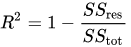
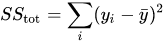
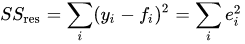
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [104]:
import sklearn.metrics as sk
score=sk.r2_score(y,Hx)
print("the R2Score is : ",score)

the R2Score is :  0.8117334526612079


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

Text(0.5, 1.0, ' Linear regression line ')

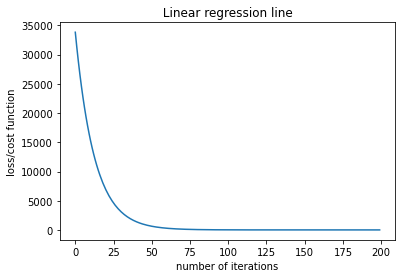

In [105]:
iterr=[i for i in range(200)]
plt.plot(iterr,loss_arr2[:200])
plt.xlabel("number of iterations")
plt.ylabel("loss/cost function")
plt.gca().set_title(" Linear regression line ")

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [121]:
Alpha=0.001
itr=200
def GD(x,y_actual,learning_rate,itr):
    theta0=random.randrange(0,5)
    theta1=random.randrange(0,5)
    loss_arr=[]
    for i in range(itr):
        y_actual=np.array(y_actual)
        y_predictd=theta0+x.dot(theta1)
        loss = np.square(y_predictd-y_actual)
        cost = np.sum(loss)/(2*len(x))
        loss_arr.append(cost)
        gradient_theta0=(learning_rate/len(x))*np.sum((y_predictd-y_actual))
        gradient_theta1=(learning_rate/len(x))*np.sum(np.dot((y_predictd-y_actual),x))
        theta0=theta0-gradient_theta0
        theta1=theta1-gradient_theta1
    return theta0,theta1,cost,y_predictd,loss_arr


outputs=GD(X,y,Alpha,itr)
outputs=list(outputs)
theta0=outputs[0]
theta1=outputs[1]
cost=outputs[4]
print("Theta0 is :",theta0,"Theta1 is :",theta1,"cost is :",outputs[2])



Theta0 is : 2.7452322047452804 Theta1 is : 0.4901402609495978 cost is : 0.20360330266824261


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

Text(0.5, 1.0, ' Linear regression line ')

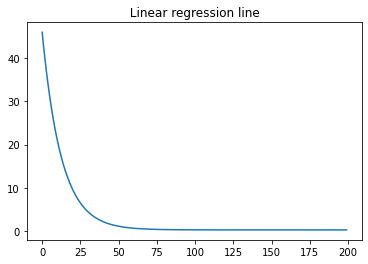

In [122]:
iterr=[i for i in range(200)]
plt.plot(iterr,cost[0:200])
plt.gca().set_title(" Linear regression line ")

Text(0.5, 1.0, ' Linear regression line ')

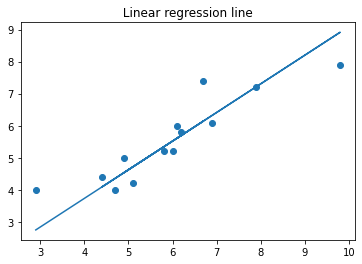

In [113]:
plt.plot(X,outputs[3])
plt.scatter(X,y)
plt.gca().set_title(" Linear regression line ")

In [114]:
import sklearn.metrics as sk
score=sk.r2_score(y,Hx)
print("the R2Score is : ",score)

the R2Score is :  0.8117334526612079


## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [1]:
import random
import numpy as np
import sklearn.metrics as sk


In [2]:
MultipleLR=np.genfromtxt('MultipleLR.csv',delimiter=',')

In [3]:
MultipleLR

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
X=MultipleLR[:,:3]
Z=MultipleLR[:,:3]

In [5]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [6]:
ones=np.array(np.ones(len(X)))
X = np.insert(X, 0, ones, axis=1)

In [7]:
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [8]:
y=MultipleLR[:,3:]

In [9]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Repeat your implementation but for more than one variable

In [10]:
def GD_multiVariable(x,y_actual,learning_rate,itr):
    n_of_theta=len(x[0])
    thetas=np.array(np.zeros(n_of_theta))
    loss_arr=[]
    for c in range(itr):
        y_predictd=np.dot(x,thetas.T)
        loss = np.square(y_predictd-y_actual)
        cost = np.sum(loss)/(2*len(x))
        loss_arr.append(cost)
        gradient_theta=(learning_rate/len(x))*np.sum(np.dot((y_predictd-y_actual),x))
        for j in range(len(thetas)):
            thetas[j]=thetas[j]- gradient_theta
    return thetas,cost,y_predictd,loss_arr
lr=0.0000001
itr=65664
outputs=list(GD_multiVariable(X,y,lr,itr))
print("last thetas values : ",outputs[0])
print("last cost Value: ",outputs[1])
print("y_predicted : \n",outputs[2])
thetas=outputs[0]

last thetas values :  [0.65897529 0.65897529 0.65897529 0.65897529]
last cost Value:  13473.678372141212
y_predicted : 
 [150.90534104 181.2182043  178.58230315 194.39771007 138.38481056
 102.1411697  145.63353873 108.07194729 169.35664911 156.83611863
 140.36173642 138.38481056 184.51308074 153.54124219 146.29251402
 183.85410545 146.29251402 174.62845142 175.94640199 157.49509392
 170.67459969 170.0156244  162.76689623 152.22329161 187.80795718]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [14]:
h_x=thetas[0]*X[:,0]+thetas[1]*X[:,1]+thetas[2]*X[:,2]+thetas[3]*X[:,3]

In [15]:
thetas[0]

0.6589752883676255

In [145]:
print(h_x)

[150.90534104 181.2182043  178.58230315 194.39771007 138.38481056
 102.1411697  145.63353873 108.07194729 169.35664911 156.83611863
 140.36173642 138.38481056 184.51308074 153.54124219 146.29251402
 183.85410545 146.29251402 174.62845142 175.94640199 157.49509392
 170.67459969 170.0156244  162.76689623 152.22329161 187.80795718]


### Plot loss vs. iterations

Text(0.5, 1.0, ' Linear regression line ')

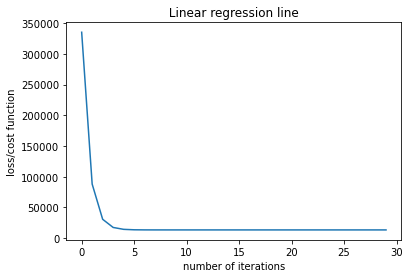

In [152]:
iterr=[i for i in range(30)]
cost=outputs[3]
plt.plot(iterr,cost[:30])
plt.xlabel("number of iterations")
plt.ylabel("loss/cost function")
plt.gca().set_title(" Linear regression line ")

#### Use R2 score to evaluate LR equation output

In [21]:
import sklearn.metrics as sk
score=sk.r2_score(y,h_x)
print("the R2Score is : ",score)

the R2Score is :  0.9587364718416065


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [10]:
import sklearn.linear_model as skl

In [21]:
RegData=np.genfromtxt('RegData.csv',delimiter=',')
x=RegData[:,0]
y=RegData[:,1]
x=x.reshape(-1,1)

In [22]:
model=skl.LinearRegression()

#### Train the model (fit the model to the training data)

In [23]:
model.fit(x,y)

LinearRegression()

#### Predict y values using the trained model

In [25]:
y_pred=model.predict(x)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

Text(0.5, 1.0, ' Linear regression line ')

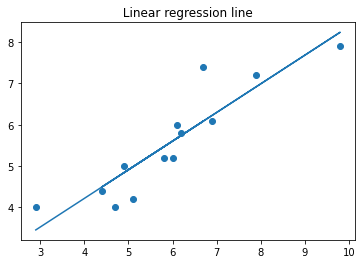

In [27]:
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.gca().set_title(" Linear regression line ")

#### Use R2 score to evaluate model output

In [28]:
import sklearn.metrics as sk
score=sk.r2_score(y,y_pred)
print("the R2Score is : ",score)

the R2Score is :  0.8213156778363777


### Repeat for Mulivariate

In [32]:
import sklearn.linear_model as skl
MultData=np.genfromtxt('MultipleLR.csv',delimiter=',')
x=MultData[:,:3]
y=MultData[:,3:]
model=skl.LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)


In [33]:
import sklearn.metrics as sk
score=sk.r2_score(y,y_pred)
print("the R2Score is : ",score)

the R2Score is :  0.9896615789448399


Can't be drawn as x1,x2,x3 +y this is 4dimensions which can't be drawn :)